<a href="https://colab.research.google.com/github/kamil3di/CMP727-Final_Project/blob/main/Breast_cancer_binary_classification_using_state_of_the_art_models(Kamil_Dinleyici).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- It is possible to predict breast cancer(diagnostic) whether the cancer is benign or malignant using features
which are computed from a digitized image of a breast mass.
- The aim of this project is to classify the patient with given features and compare the performance metrics
around support vector machines(SVM), decision tree and random forest state-of-the-art models

## Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Reading the csv data file and show the first 5 rows
df =  pd.read_csv('/content/drive/MyDrive/CMP682-AI/breast-cancer-dataset.csv')
df.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## Exploring the data

In [ ]:
df.shape

(569, 33)

In [ ]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
df = df.drop(['Unnamed: 32'],axis=1)

In [ ]:
df.shape

(569, 32)

In [ ]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [ ]:
df.corr()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,1.000000,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,-0.022114,...,0.082405,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866
radius_mean,0.074626,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.099770,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.073159,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.096893,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,-0.012968,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.000096,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.050080,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.044158,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,-0.022114,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


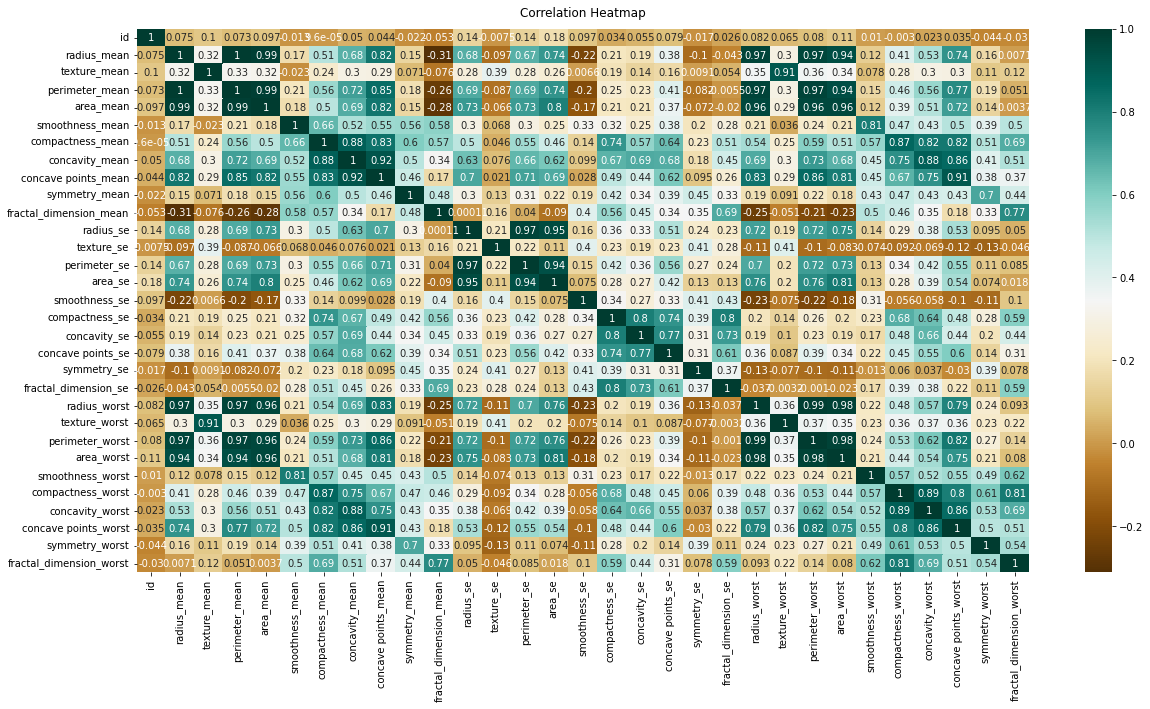

In [ ]:
# PLOTTING HEATMAP FOR VISUALISING CORRELATION BETWEEN FEATURES
plt.figure(figsize=(20, 10))
heatmap = sb.heatmap(df.corr(),cmap='BrBG',annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

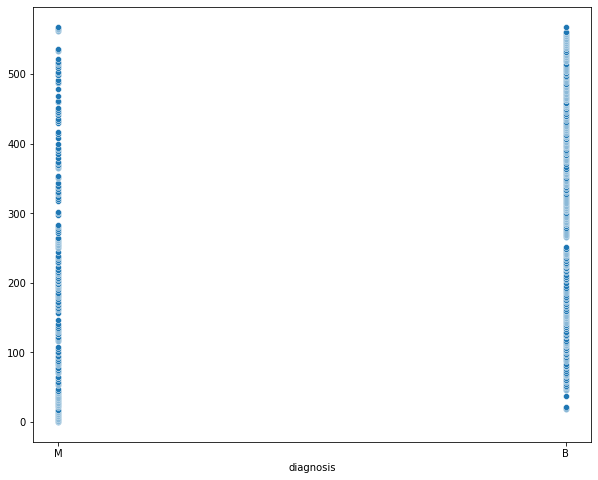

In [ ]:
#check the balance in dependent feature
plt.figure(figsize=(10, 8))
sb.scatterplot(y = df.index , x= df.diagnosis,palette = 'BrBe')

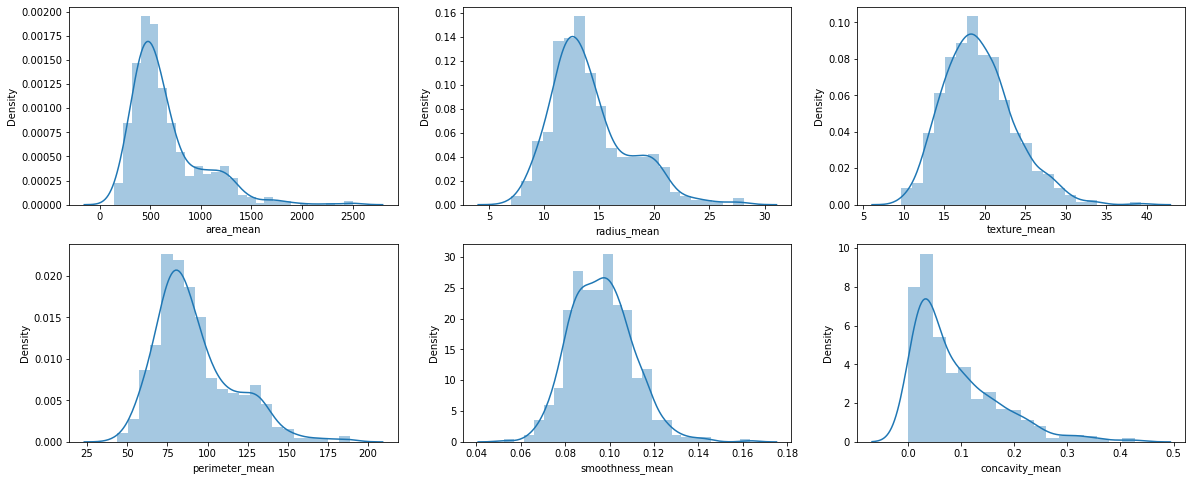

In [ ]:
#CHECKING DISTRIBUTION OF DATA IN FEATURES
fig, axes = plt.subplots(2,3,figsize=(20,8))
sb.distplot(df['area_mean'],ax = axes[0,0])
sb.distplot(df['radius_mean'],ax = axes[0,1])
sb.distplot(df['texture_mean'],ax = axes[0,2])
sb.distplot(df['perimeter_mean'],ax = axes[1,0])
sb.distplot(df['smoothness_mean'],ax = axes[1,1])
sb.distplot(df['concavity_mean'],ax = axes[1,2])

## Mapping "Diagnosis" column

In [ ]:
df['diagnosis']=df['diagnosis'].map({'M':1,'B':0})
df['diagnosis']

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

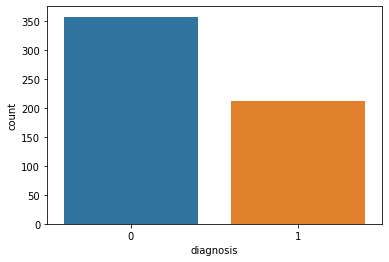

In [ ]:
# lets get the frequency of cancer stages
sb.countplot(df['diagnosis'],label="Count")

## PCA

Principal Component Analysis, or PCA, is a dimensionality-reduction method that is often used to reduce the dimensionality of large data sets, by transforming a large set of variables into a smaller one that still contains most of the information in the large set.
PCA is a very flexible tool and allows analysis of datasets that may contain, for example, multicollinearity, missing values, categorical data, and imprecise measurements. The goal is to extract the important information from the data and to express this information as a set of summary indices called principal components.

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
scaler.fit(df)

StandardScaler()

In [ ]:
scaled_data = scaler.transform(df)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

In [ ]:
pca.fit(scaled_data)

PCA(n_components=2)

In [ ]:
x_pca = pca.transform(scaled_data)

In [ ]:
scaled_data.shape, x_pca.shape

((569, 32), (569, 2))

In [ ]:
pca_df = pd.DataFrame(data = x_pca, columns = ['principal component 1', 'principal component 2'])
pca_df

,principal component 1,principal component 2
0,9.216724,2.136750
1,2.651244,-3.770741
2,5.900697,-1.010916
3,7.137376,10.315636
4,4.139263,-1.916891
...,...,...
564,6.589934,-3.444874
565,4.020812,-3.546088
566,1.525754,-1.950552
567,10.395832,1.871229


## Visualising PCA

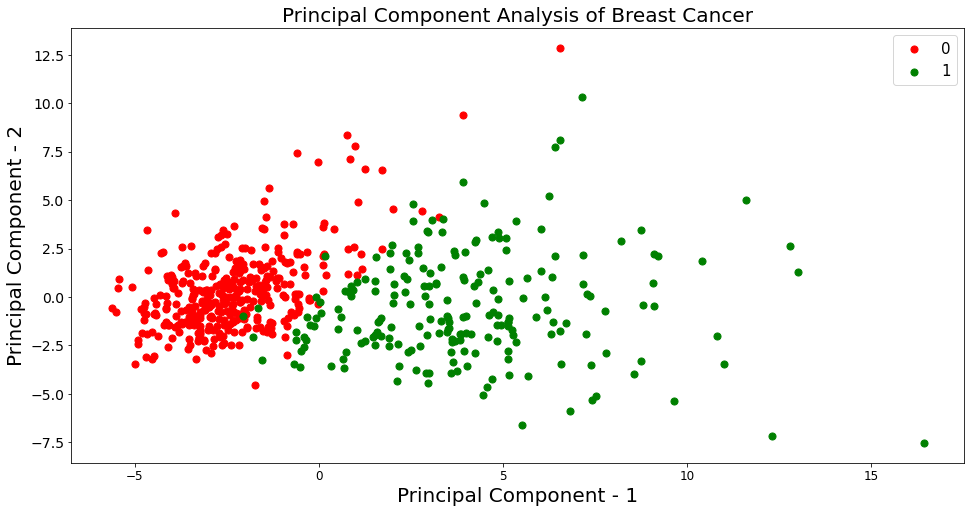

In [ ]:
plt.figure(figsize=(16,8))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis of Breast Cancer",fontsize=20)
targets = [0,1]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = df['diagnosis'] == target
    plt.scatter(pca_df.loc[indicesToKeep, 'principal component 1']
               , pca_df.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})

## Split data into train and test

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df[['radius_mean', 'texture_mean', 'perimeter_mean','area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean','radius_se', 'texture_se', 'perimeter_se', 'area_se',
       'smoothness_se','compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst','perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst','symmetry_worst', 'fractal_dimension_worst']]
Y = df[['diagnosis']]

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,
                                                 Y,
                                                 test_size = 0.2,
                                                 random_state=42)

In [ ]:
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((512, 30), (512, 1), (57, 30), (57, 1))

## PCA predictions
I made calculations using PCA but it did not improve the accuracy score.

## Feature Scaling

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### 1)Decision Tree 

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion='gini')

In [ ]:
dtc.fit(X_train,Y_train)

DecisionTreeClassifier()

In [ ]:
Y_dtc = dtc.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score
r2_dtc = r2_score(Y_test, Y_dtc)

In [ ]:
acc_dtc = accuracy_score(Y_test, Y_dtc)
print('ACCURACY SCORE: ',acc_dtc)
cm_dtc = confusion_matrix(Y_test,Y_dtc)
print('CONFUSION MATRIX: \n',cm_dtc)

ACCURACY SCORE:  0.9473684210526315
CONFUSION MATRIX: 
 [[38  2]
 [ 1 16]]


### 2)Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(criterion='entropy')

In [ ]:
rfc.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy')

In [ ]:
Y_rfc = rfc.predict(X_test)

In [ ]:
r2_rfc = r2_score(Y_test, Y_rfc)

In [ ]:
acc_rfc = accuracy_score(Y_test, Y_rfc)
print('ACCURACY SCORE: ',acc_rfc)
cm_rfc = confusion_matrix(Y_test,Y_rfc)
print('CONFUSION MATRIX: \n',cm_rfc)

ACCURACY SCORE:  0.9649122807017544
CONFUSION MATRIX: 
 [[39  1]
 [ 1 16]]


### 3)Support Vector Machine

In [ ]:
from sklearn.svm import SVC
svc = SVC()

In [ ]:
svc.fit(X_train,Y_train)

SVC()

In [ ]:
Y_svc = svc.predict(X_test)

In [ ]:
r2_svc = r2_score(Y_test, Y_svc)

In [ ]:
acc_svc = accuracy_score(Y_test, Y_svc)
print('ACCURACY SCORE: ',acc_svc)
cm_svc = confusion_matrix(Y_test,Y_svc)
print('CONFUSION MATRIX: \n',cm_svc)

ACCURACY SCORE:  0.9649122807017544
CONFUSION MATRIX: 
 [[39  1]
 [ 1 16]]


## Precision, recall, accuracy and F1 scores in mean

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import cross_validate

scoring = ['precision', 'recall', 'accuracy', 'f1']

kfold = KFold(n_splits=5, random_state=42, shuffle=True)

In [ ]:
multi_scores_dtc = cross_validate(DecisionTreeClassifier(criterion='gini'), X, Y, cv=kfold, scoring=scoring)

print("Test precision mean for Decision Tree: " + str(round(multi_scores_dtc['test_precision'].mean(),2)))
print("Test recall mean for Decision Tree: " + str(round(multi_scores_dtc['test_recall'].mean(),2)))
print("Test f1 score mean for Decision Tree: " + str(round(multi_scores_dtc['test_f1'].mean(),2)))
print("Test accuracy mean for Decision Tree: " + str(round(multi_scores_dtc['test_accuracy'].mean(),2)))

Test precision mean for Decision Tree: 0.91
Test recall mean for Decision Tree: 0.9
Test f1 score mean for Decision Tree: 0.9
Test accuracy mean for Decision Tree: 0.93


In [ ]:
multi_scores_rfc = cross_validate(RandomForestClassifier(criterion='entropy'), X, Y, cv=kfold, scoring=scoring)

print("Test precision mean for Random Forest: " + str(round(multi_scores_rfc['test_precision'].mean(),2)))
print("Test recall mean Random Forest: " + str(round(multi_scores_rfc['test_recall'].mean(),2)))
print("Test f1 score mean Random Forest: " + str(round(multi_scores_rfc['test_f1'].mean(),2)))
print("Test accuracy mean Random Forest: " + str(round(multi_scores_rfc['test_accuracy'].mean(),2)))

Test precision mean for Random Forest: 0.96
Test recall mean Random Forest: 0.94
Test f1 score mean Random Forest: 0.95
Test accuracy mean Random Forest: 0.96


In [ ]:
multi_scores_svc = cross_validate(SVC(), X, Y, cv=kfold, scoring=scoring)

print("Test precision mean for SVC: " + str(round(multi_scores_svc['test_precision'].mean(),2)))
print("Test recall mean for SVC: " + str(round(multi_scores_svc['test_recall'].mean(),2)))
print("Test f1 score mean for SVC: " + str(round(multi_scores_svc['test_f1'].mean(),2)))
print("Test accuracy mean for SVC: " + str(round(multi_scores_svc['test_accuracy'].mean(),2)))

Test precision mean for SVC: 0.97
Test recall mean for SVC: 0.81
Test f1 score mean for SVC: 0.88
Test accuracy mean for SVC: 0.92


In [ ]:
models = pd.DataFrame({
    'Model': ['Decision Tree','Random Forest','Support Vector Machines'],
    'Accuracy Score': [acc_dtc,acc_rfc, acc_svc]})
models.sort_values(by='Accuracy Score', ascending=False)

,Model,Accuracy Score
1,Random Forest,0.964912
2,Support Vector Machines,0.964912
0,Decision Tree,0.947368


In [ ]:
models = pd.DataFrame({
    'Model': ['Decision Tree','Random Forest','Support Vector Machines'],
    'R2 Score': [r2_dtc,r2_rfc, r2_svc]})
models.sort_values(by='R2 Score', ascending=False)

,Model,R2 Score
1,Random Forest,0.832353
2,Support Vector Machines,0.832353
0,Decision Tree,0.748529
